Link to the slides: https://drive.google.com/file/d/1wlTt949oOvvP2x5URxk6I9AlUd2mlTLe/view

## Init

In [168]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

img2tensor = transforms.ToTensor()
img2grayscale = transforms.Grayscale()
def plot_tensor(t): 
    plt.figure(figsize=(10,10))
    plt.imshow(t.permute(1, 2, 0).detach().cpu())
    
def plot_b_tensor(t): 
    plt.figure(figsize=(10,10))
    plt.imshow(t.squeeze(0).permute(1, 2, 0).detach().cpu())

eps = 1e-6

In [169]:
image_path = Path('assets/corners.jpg')
print(f'Image exists: {image_path.exists()}')

img_t = img2tensor(Image.open(image_path)).unsqueeze(0)

Image exists: True


In [170]:
img_t.shape

torch.Size([1, 3, 852, 1280])

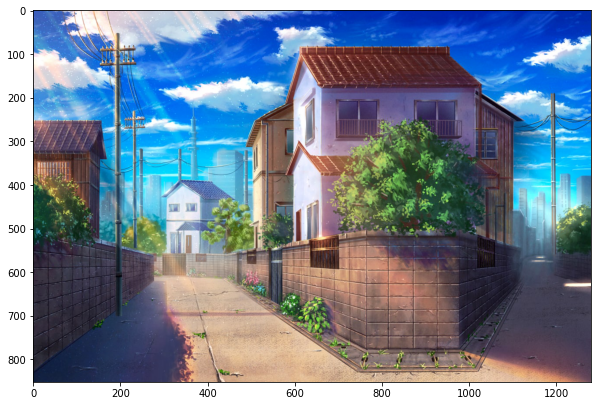

In [171]:
plot_b_tensor(img_t)

## Implementation

In [172]:
guassian_f = torchvision.transforms.GaussianBlur(9, sigma=(1, 2))

In [173]:
gray_img_t = img2grayscale(img_t)

B, C, H, W = blured_img_t.shape
kernel_size = 3
energy_t = torch.zeros(B, C, kernel_size, kernel_size, H, W)
pad = 1
pad_img = F.pad(gray_img_t, (pad, pad, pad, pad), mode='replicate') 

for u in range(kernel_size):
    for v in range(kernel_size):
        energy_t[:, :, u, v, :, :] = guassian_f((gray_img_t - pad_img[:, :, u:H+u, v:W+v]).pow(2))
        
        
energy_t[:,:,pad,pad,:,:] = 100000.
out = energy_t.min(dim=2)[0].min(dim=2)[0]

out[out>0.025]=1.

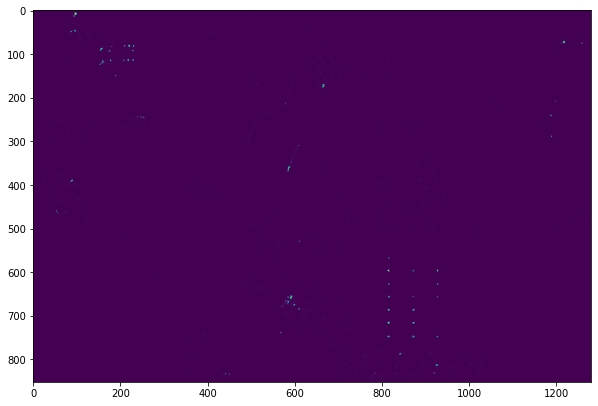

In [179]:
plot_b_tensor(out)

In [177]:
img_t[:, :1, :, :][out==1] = 1.
img_t[:, 1:2, :, :][out==1] = 0.
img_t[:, 2:, :, :][out==1] = 0.

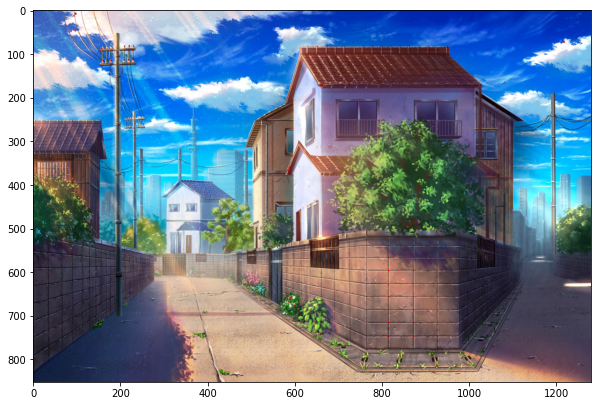

In [178]:
plot_b_tensor(img_t)